In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_parquet("/media/pankhuri/MData/safe_dataset.sample/sample", engine='pyarrow')

In [4]:
df.head()

,argument_0,argument_1,argument_2,argument_3,argument_4,argument_5,argument_6,argument_7,argument_8,arguments,...,script_line,script_loc_eval,script_url,symbol,time_stamp,value,value_1000,value_len,valid,errors
0,,,,,,,,,,{},...,57,,https://staticxx.facebook.com/connect/xd_arbit...,window.name,2017-12-16 02:54:10.079,fb_xdm_frame_https,fb_xdm_frame_https,18,True,
1,,,,,,,,,,{},...,57,,https://staticxx.facebook.com/connect/xd_arbit...,window.name,2017-12-16 02:54:10.080,fb_xdm_frame_https,fb_xdm_frame_https,18,True,
2,,,,,,,,,,{},...,57,,https://staticxx.facebook.com/connect/xd_arbit...,window.document.cookie,2017-12-16 02:54:10.086,,,0,True,
3,,,,,,,,,,{},...,49,,https://staticxx.facebook.com/connect/xd_arbit...,window.navigator.userAgent,2017-12-16 02:54:10.088,Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...,Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...,68,True,
4,,,,,,,,,,{},...,25,,https://ajax.googleapis.com/ajax/libs/webfont/...,window.navigator.userAgent,2017-12-16 07:12:07.104,Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...,Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...,68,True,


## Initial Analysis

To more easily see the column names and kind of values they hold, transpose of the head is taken

In [5]:
sample_cols=df.T

In [7]:
sample_cols

,0,1,2,3,4,5,6,7,8,9,...,9224,9225,9226,9227,9228,9229,9230,9231,9232,9233
argument_0,,,,,,,,,,,...,,,,,,,,,,
argument_1,,,,,,,,,,,...,,,,,,,,,,
argument_2,,,,,,,,,,,...,,,,,,,,,,
argument_3,,,,,,,,,,,...,,,,,,,,,,
argument_4,,,,,,,,,,,...,,,,,,,,,,
argument_5,,,,,,,,,,,...,,,,,,,,,,
argument_6,,,,,,,,,,,...,,,,,,,,,,
argument_7,,,,,,,,,,,...,,,,,,,,,,
argument_8,,,,,,,,,,,...,,,,,,,,,,
arguments,{},{},{},{},{},{},{},{},{},{},...,{},{},{},{},{},{},{},{},{},{}


In [12]:
df.dtypes

argument_0                  object
argument_1                  object
argument_2                  object
argument_3                  object
argument_4                  object
argument_5                  object
argument_6                  object
argument_7                  object
argument_8                  object
arguments                   object
arguments_n_keys             int64
call_id                     object
call_stack                  object
crawl_id                     int64
file_name                   object
func_name                   object
in_iframe                     bool
location                    object
operation                   object
script_col                  object
script_line                 object
script_loc_eval             object
script_url                  object
symbol                      object
time_stamp          datetime64[ns]
value                       object
value_1000                  object
value_len                    int32
valid               

In [10]:
df.describe()

,arguments_n_keys,crawl_id,value_len
count,9234.000000,9234.0,9234.000000
mean,0.259368,1.0,347.945636
std,0.730412,0.0,2529.274714
min,0.000000,1.0,0.000000
25%,0.000000,1.0,2.000000
50%,0.000000,1.0,68.000000
75%,0.000000,1.0,139.000000
max,6.000000,1.0,103878.000000


## Preliminary Visualization

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
df['location'].head(20)

0     https://staticxx.facebook.com/connect/xd_arbit...
1     https://staticxx.facebook.com/connect/xd_arbit...
2     https://staticxx.facebook.com/connect/xd_arbit...
3     https://staticxx.facebook.com/connect/xd_arbit...
4     https://cas.us.criteo.com/delivery/r/afr.php?d...
5     http://pos.baidu.com/rcwm?rdid=2835655&dc=3&di...
6     https://staticxx.facebook.com/connect/xd_arbit...
7     https://staticxx.facebook.com/connect/xd_arbit...
8     https://staticxx.facebook.com/connect/xd_arbit...
9     https://staticxx.facebook.com/connect/xd_arbit...
10             https://www.jumia.co.ke/shipping_policy/
11             https://www.jumia.co.ke/shipping_policy/
12             https://www.jumia.co.ke/shipping_policy/
13                      https://www.syracuse.edu/about/
14                      https://www.syracuse.edu/about/
15                      https://www.syracuse.edu/about/
16                      https://www.syracuse.edu/about/
17                      https://www.syracuse.edu

In [16]:
def split_for_location(s):
    a=s.split('/')
    return a[2]

In [17]:
df['filter_location']=df['location'].apply(split_for_location)

In [18]:
df.head(5)

,argument_0,argument_1,argument_2,argument_3,argument_4,argument_5,argument_6,argument_7,argument_8,arguments,...,script_loc_eval,script_url,symbol,time_stamp,value,value_1000,value_len,valid,errors,filter_location
0,,,,,,,,,,{},...,,https://staticxx.facebook.com/connect/xd_arbit...,window.name,2017-12-16 02:54:10.079,fb_xdm_frame_https,fb_xdm_frame_https,18,True,,staticxx.facebook.com
1,,,,,,,,,,{},...,,https://staticxx.facebook.com/connect/xd_arbit...,window.name,2017-12-16 02:54:10.080,fb_xdm_frame_https,fb_xdm_frame_https,18,True,,staticxx.facebook.com
2,,,,,,,,,,{},...,,https://staticxx.facebook.com/connect/xd_arbit...,window.document.cookie,2017-12-16 02:54:10.086,,,0,True,,staticxx.facebook.com
3,,,,,,,,,,{},...,,https://staticxx.facebook.com/connect/xd_arbit...,window.navigator.userAgent,2017-12-16 02:54:10.088,Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...,Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...,68,True,,staticxx.facebook.com
4,,,,,,,,,,{},...,,https://ajax.googleapis.com/ajax/libs/webfont/...,window.navigator.userAgent,2017-12-16 07:12:07.104,Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...,Mozilla/5.0 (X11; Linux x86_64; rv:52.0) Gecko...,68,True,,cas.us.criteo.com


In [28]:
from matplotlib import rcParams

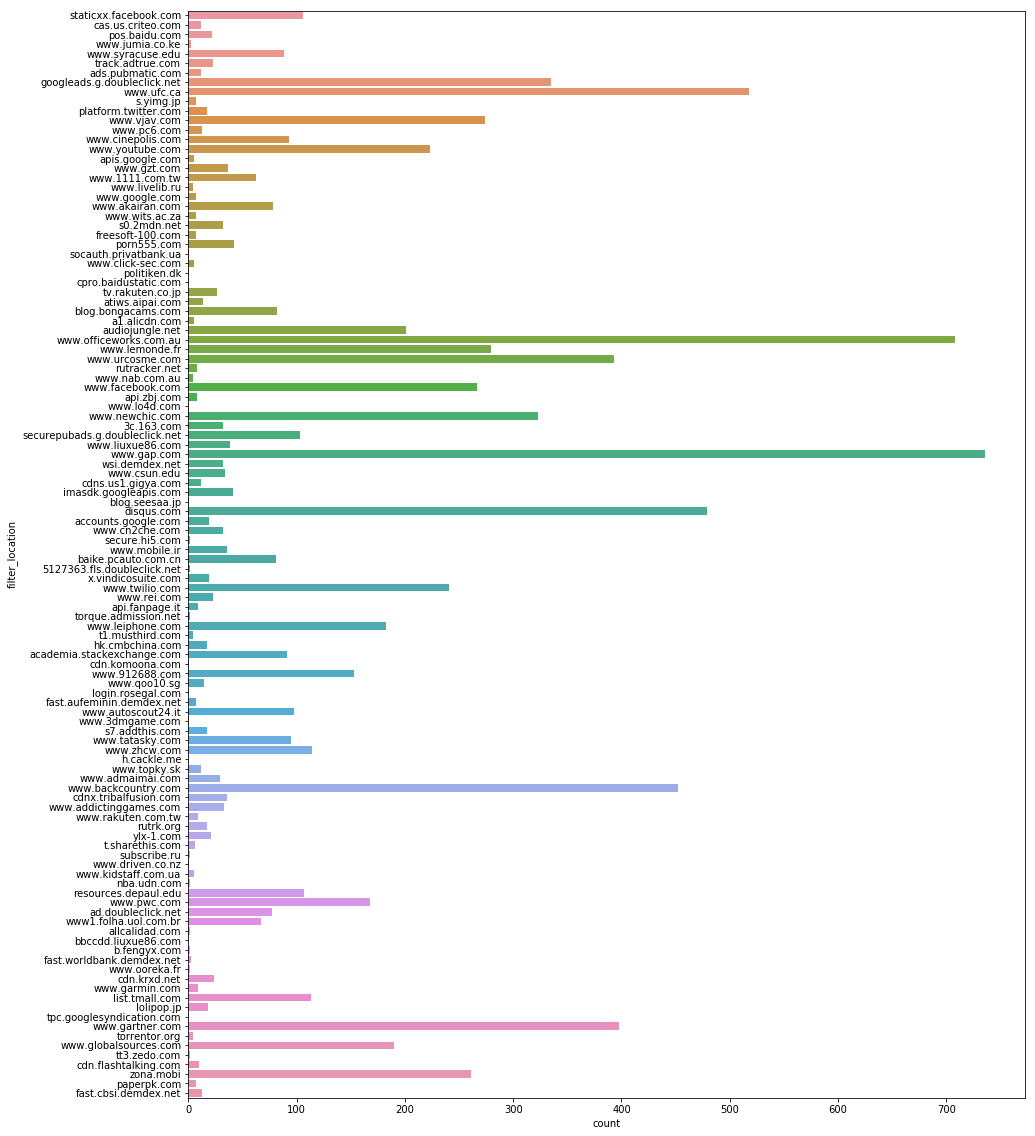

In [35]:
plt.figure(figsize=(15,20))
fig=sns.countplot(y='filter_location', data=df)

In [22]:
df.filter_location.unique()

array(['staticxx.facebook.com', 'cas.us.criteo.com', 'pos.baidu.com',
       'www.jumia.co.ke', 'www.syracuse.edu', 'track.adtrue.com',
       'ads.pubmatic.com', 'googleads.g.doubleclick.net', 'www.ufc.ca',
       's.yimg.jp', 'platform.twitter.com', 'www.vjav.com', 'www.pc6.com',
       'www.cinepolis.com', 'www.youtube.com', 'apis.google.com',
       'www.gzt.com', 'www.1111.com.tw', 'www.livelib.ru',
       'www.google.com', 'www.akairan.com', 'www.wits.ac.za',
       's0.2mdn.net', 'freesoft-100.com', 'porn555.com',
       'socauth.privatbank.ua', 'www.click-sec.com', 'politiken.dk',
       'cpro.baidustatic.com', 'tv.rakuten.co.jp', 'atiws.aipai.com',
       'blog.bongacams.com', 'a1.alicdn.com', 'audiojungle.net',
       'www.officeworks.com.au', 'www.lemonde.fr', 'www.urcosme.com',
       'rutracker.net', 'www.nab.com.au', 'www.facebook.com',
       'api.zbj.com', 'www.lo4d.com', 'www.newchic.com', '3c.163.com',
       'securepubads.g.doubleclick.net', 'www.liuxue86.com',
     

In [24]:
loc_counts= df['filter_location'].value_counts().to_dict()

In [25]:
loc_counts

{'www.gap.com': 736,
 'www.officeworks.com.au': 708,
 'www.ufc.ca': 518,
 'disqus.com': 479,
 'www.backcountry.com': 452,
 'www.gartner.com': 398,
 'www.urcosme.com': 393,
 'googleads.g.doubleclick.net': 335,
 'www.newchic.com': 323,
 'www.lemonde.fr': 280,
 'www.vjav.com': 274,
 'www.facebook.com': 267,
 'zona.mobi': 261,
 'www.twilio.com': 241,
 'www.youtube.com': 223,
 'audiojungle.net': 201,
 'www.globalsources.com': 190,
 'www.leiphone.com': 183,
 'www.pwc.com': 168,
 'www.912688.com': 153,
 'www.zhcw.com': 114,
 'list.tmall.com': 113,
 'resources.depaul.edu': 107,
 'staticxx.facebook.com': 106,
 'securepubads.g.doubleclick.net': 103,
 'www.autoscout24.it': 98,
 'www.tatasky.com': 95,
 'www.cinepolis.com': 93,
 'academia.stackexchange.com': 91,
 'www.syracuse.edu': 88,
 'blog.bongacams.com': 82,
 'baike.pcauto.com.cn': 81,
 'www.akairan.com': 78,
 'ad.doubleclick.net': 77,
 'www1.folha.uol.com.br': 67,
 'www.1111.com.tw': 63,
 'porn555.com': 42,
 'imasdk.googleapis.com': 41,
 'www

According to the observations in "Tracking the Trackers <https://www.ghostery.com/lp/study/>", Google Analytics, followed by Facebook Connect, are most prevalent scripts. However, from the above observations, we can see that "gap" , followed by Officeworks, are the most common script urls in this sample. A search reveals that GAP stands for "Google Analytics Painless" which supports the article. But here the second most common script url is that of "officeworks" not "facebook". But this does ignore the various cross-domains of Facebook.